In [221]:
using Pkg
Pkg.activate("../")

using OrdinaryDiffEq,DiffEqCallbacks, Plots, LinearAlgebra, Distributions

In [378]:
## Parameters ect.
u0 = rand(4) .+ 10

tspan = (0.0,1.0)
p = Dict(:n => 4,
         :r => ones(4),
         :A => -rand(4,4) ./100)

Dict{Symbol,Any} with 3 entries:
  :n => 4
  :A => [-0.000664176 -0.00122843 -0.00730609 -0.00581225; -0.00750763 -0.00733…
  :r => [1.0, 1.0, 1.0, 1.0]

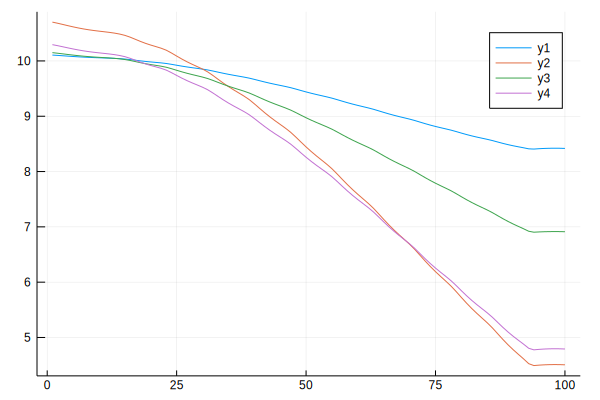

In [379]:
## Full model
function dCdt_full(du,u,p,t)
    for i = 1:p[:n]
     du[i] += p[:r][i]
        for j = 1:p[:n]
           du[i] += u[i] * u[j] * p[:A][i,j]
        end
    end
end

prob = ODEProblem(dCdt_full,u0,tspan,p)
sol_real = solve(prob,alg = AutoTsit5(Rosenbrock23()))

sr_array = sol_real(range(0,length = 100, stop = 1.0)).u
sr_array = hcat(sr_array...)'

plot(sr_array)

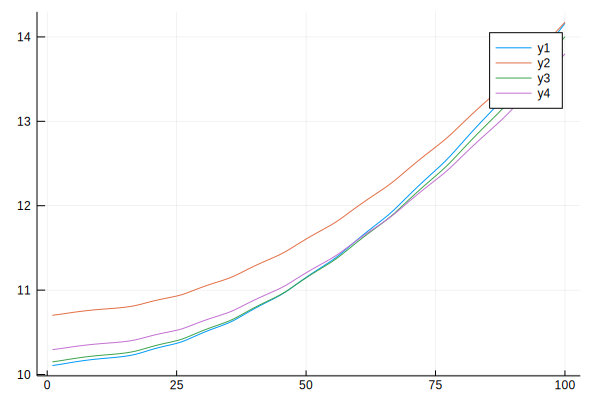

In [381]:
## Full model
function dCdt_lin(du,u,p,t)
    for i = 1:p[:n]
     du[i] += p[:r][i]
        for j = 1:p[:n]
           du[i] += u[j] * p[:A][i,j]
        end
    end
end

prob = ODEProblem(dCdt_lin,u0,tspan,p)
sol_lin = solve(prob,alg = AutoTsit5(Rosenbrock23()))

sl_array = sol_lin(range(0,length = 100, stop = 1.0)).u
sl_array = hcat(sl_array...)'

plot(sl_array)

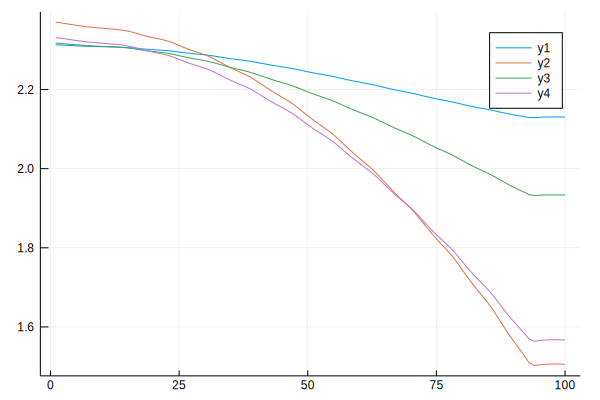

In [383]:
plot(log.(sr_array))
plot!(log.(sr_array))

In [302]:
(sol_real_array)

63×5 Array{Float64,2}:
  9.60843   8.46415   3.80541     1.73669     0.848335
  9.51875   8.39408   3.69948     1.58963     0.848335
  9.43686   8.33118   3.60367     1.45562     0.848335
  9.31278   8.23778   3.46011     1.25307     0.848335
  9.1573    8.12373   3.28274     1.00003     0.848335
  8.97588   7.99481   3.07933     0.70588     0.848335
  8.77612   7.85818   2.85987     0.383388    0.848335
  8.5678    7.72192   2.63633     0.0487232   0.848335
  8.53475   7.70689   2.60652    -0.00262342  0.848335
  8.50171   7.69218   2.57698    -0.0538743   0.848335
  8.46535   7.67608   2.54455    -0.11025     0.848335
  8.4256    7.65859   2.50919    -0.171866    0.848335
  8.38208   7.63959   2.47063    -0.239258    0.848335
  ⋮                                                   
 -1.37406   8.48761  -1.49232   -13.912       0.848335
 -1.86396   8.88416  -1.35494   -14.496       0.848335
 -2.37451   9.3389   -1.17061   -15.0923      0.848335
 -2.90133   9.85217  -0.936324  -15.6942  

In [115]:
eigvals(A)

5-element Array{Complex{Float64},1}:
  -1.9929018138452115 + 0.0im               
  -0.7359359790515496 + 0.0im               
  0.46144848911959413 + 0.2546366926505555im
  0.46144848911959413 - 0.2546366926505555im
 0.062429422009638524 + 0.0im               